In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import kpss
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


In [2]:
excel_sheet = pd.read_excel("Datos TallerMCII 2023-1 (1).xlsx", sheet_name = "PUNTO IV")
excel_sheet.set_index("FECHA", inplace = True)
excel_sheet.columns = ["brent"]

excel_sheet["log_brent"] = np.log(excel_sheet["brent"])
excel_sheet.head(5)

,brent,log_brent
FECHA,,
2019-03-01,65.07,4.175464
2019-03-04,65.67,4.184642
2019-03-05,65.86,4.187531
2019-03-06,65.99,4.189503
2019-03-07,66.30,4.194190


 - Revisar estacionariedad *Manual*

In [3]:
# Realizar el test KPSS
kpss_stat, p_value, lags, crit = kpss(excel_sheet["log_brent"].diff(1).dropna())

# Imprimir un resumen del test KPSS
print("Resumen del test KPSS:")
print(f"Estadístico KPSS: {kpss_stat}")
print(f"Valor p: {p_value}")
print(f"Número de lags utilizados: {lags}")
print("Valores críticos:")
for key, value in crit.items():
    print(f"  {key}: {value}")

    # Verificar la estacionariedad en media y especificar la hipótesis nula
alpha = 0.05
if p_value < alpha:
    print("La serie temporal NO es estacionaria en media.")
    print("Hipótesis nula: Existe una raíz unitaria (la serie no es estacionaria en media).")
else:
    print("La serie temporal es estacionaria en media.")
    print("Hipótesis nula: No existe una raíz unitaria (la serie es estacionaria en media).")

Resumen del test KPSS:
Estadístico KPSS: 0.09519945750577014
Valor p: 0.1
Número de lags utilizados: 5
Valores críticos:
  10%: 0.347
  5%: 0.463
  2.5%: 0.574
  1%: 0.739
La serie temporal es estacionaria en media.
Hipótesis nula: No existe una raíz unitaria (la serie es estacionaria en media).


/tmp/ipykernel_3300/3213661305.py:2: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_stat, p_value, lags, crit = kpss(excel_sheet["log_brent"].diff(1).dropna())


Revisar Estacionariedad *Automatico*

In [4]:
alpha = 0.05

num_diffs = 0
kpss_result_auto = kpss(excel_sheet["log_brent"])
while kpss_result_auto[1] < alpha:
    num_diffs += 1
    ts = excel_sheet["log_brent"].diff(num_diffs).dropna()
    kpss_result_auto = kpss(ts)
 
print(f"Numero de diferencias requeridas: {num_diffs}")

Numero de diferencias requeridas: 1


/tmp/ipykernel_3300/181755742.py:4: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_result_auto = kpss(excel_sheet["log_brent"])
/tmp/ipykernel_3300/181755742.py:8: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_result_auto = kpss(ts)


In [45]:
excel_sheet[f"log_brent_{num_diffs}"] = excel_sheet["log_brent"].diff(num_diffs).fillna(0)
excel_sheet.head()

,brent,log_brent,log_brent_1
FECHA,,,
2019-03-01,65.07,4.175464,0.000000
2019-03-04,65.67,4.184642,0.009179
2019-03-05,65.86,4.187531,0.002889
2019-03-06,65.99,4.189503,0.001972
2019-03-07,66.30,4.194190,0.004687


 - Estimar los errores a partir de una regresion 'log_brent_1 c' revisar si son o no ruido blanco los errores a partir del correlograma

In [47]:
acf, conf_int, q_stat, p_values  = acf(excel_sheet["log_brent_1"], nlags=100, alpha=0.05, qstat=True)

TypeError: 'numpy.ndarray' object is not callable

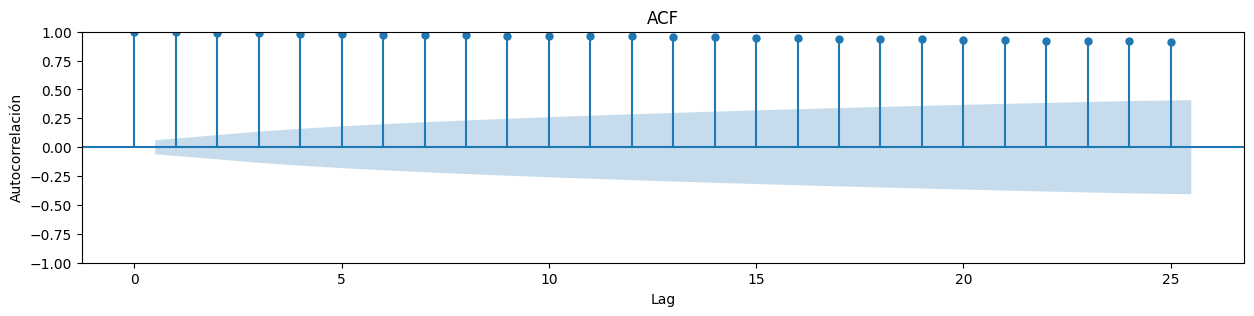

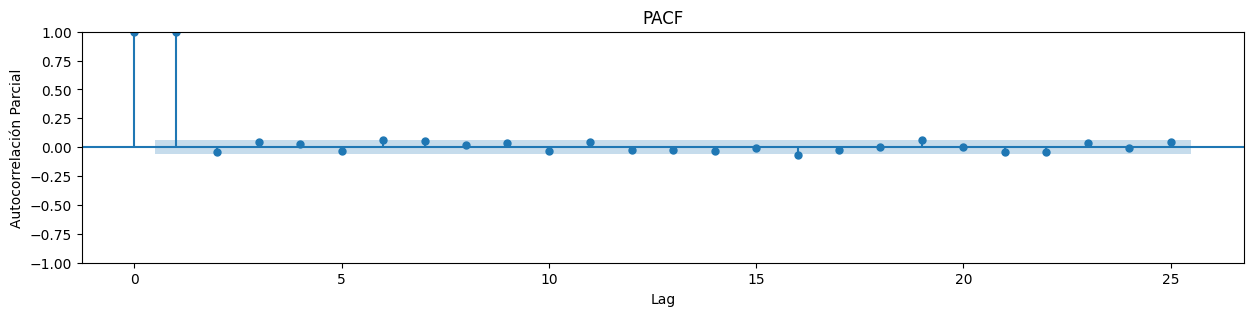

In [10]:
# Extraer la serie temporal
ts = excel_sheet['log_brent_1'].dropna()

# Calcular y graficar la ACF
fig, ax = plt.subplots(figsize=(15, 3))
plot_acf(excel_sheet['brent'], lags=25, ax=ax)

# Configurar etiquetas y título del gráfico de la ACF
ax.set_xlabel('Lag')
ax.set_ylabel('Autocorrelación')
ax.set_title('ACF')

# Mostrar el gráfico de la ACF
plt.show()

# Calcular y graficar la PACF
fig, ax = plt.subplots(figsize=(15, 3))
plot_pacf(excel_sheet['brent'], lags=25, ax=ax)

# Configurar etiquetas y título del gráfico de la PACF
ax.set_xlabel('Lag')
ax.set_ylabel('Autocorrelación Parcial')
ax.set_title('PACF')

# Mostrar el gráfico de la PACF
plt.show()